# Goal
Using scikit-learn, write a Naive Bayes classifier in Python. It can be single or multiple features. Submit the classifier in the form of an executable Python script alongside basic instructions for testing.

This Naive Bayes classification script should allow you to do the following:

- Calculate the posterior probability by converting the dataset into a frequency table.
- Create a "Likelihood" table by finding relevant probabilities.
- Calculate the posterior probability for each class.
- Correct Zero Probability errors using Laplacian correction.

This classifier may use a Gaussian, Multinomial, or Bernoulli model, depending on chosen function. The classifier must properly display its probability prediction based on its input data.

Scikit Learn's [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) \
[Iris dataset in SkLearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \
[Iris dataset in Kaggle](https://www.kaggle.com/datasets/uciml/iris?resource=download)

# Workspace Setup

In [24]:
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import and Split Data


In [20]:
iris = pd.read_csv('iris.csv')
train, test = train_test_split(iris, test_size = 0.2, train_size = 0.8, random_state = 20191220, shuffle = True)
# https://www.geeksforgeeks.org/how-to-exclude-columns-in-pandas/
train_features = train.loc[:, train.columns != 'Species']
train_values = train['Species']
test_features = test.loc[:, test.columns != 'Species']
test_values = test['Species']

In [29]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Build Gaussian Naives-Bayes Classification Model
[Hint](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)

In [21]:
classifier = naive_bayes.GaussianNB()
prediction = classifier.fit(train_features, train_values).predict(test_features)

In [23]:
print("Out of %d total points, %d were mislabled"
      % (test_features.shape[0], (test_values != prediction).sum()))

Out of 30 total points, 0 were mislabled


## Confusion Matrices

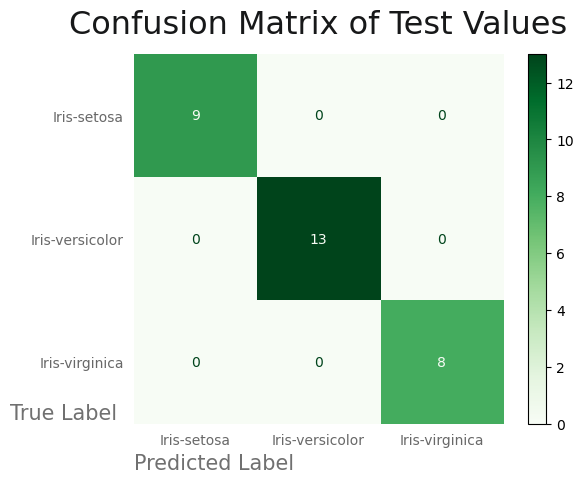

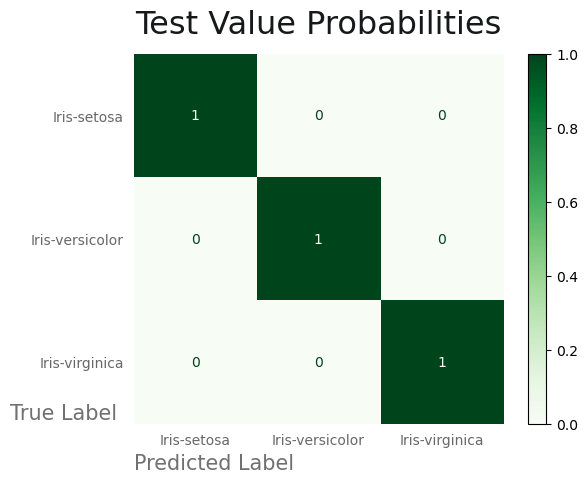

In [58]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
titles_options = [
    ("Confusion Matrix of Test Values", None),
    ("Test Value Probabilities", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        test_features,
        test_values,
        display_labels = iris['Species'].unique(),
        cmap = plt.cm.Greens,
        normalize = normalize,
    )
    disp.ax_.set_title(title, fontsize = 23, pad = 15).set_color('#171819')
    disp.ax_.set_xlabel('Predicted Label', fontsize = 15, loc =
				'left').set_color('#707070')
    disp.ax_.set_ylabel('True Label', fontsize = 15, rotation =
				'horizontal', loc = 'bottom', labelpad =
				15).set_color('#707070')
    # https://stackoverflow.com/a/52472732/13801562
    plt.box(False)
    disp.ax_.tick_params(axis='y', which='both', right=False,
				left=False, colors = '#686868')
    disp.ax_.tick_params(axis='x', which='both', top=False,
				bottom=False, colors = '#686868')
    